In [4]:
%matplotlib inline
from ndreg import *
import matplotlib
import ndio.remote.neurodata as neurodata
import random

In [5]:
inToken = 'Aut1367'
ori1 = 'RPS'
refToken = "ara_ccf2"                         # hardcoded 'ara_ccf2' atlas until additional functionality is requested

In [6]:
refImg = imgDownload(refToken)                # download atlas
refAnnoImg = imgDownload(refToken, channel="annotation")
print "reference token/atlas obtained"

reference token/atlas obtained


In [7]:
inImg = imgDownload(inToken, resolution=5)    # store downsampled level 5 brain to memory
(values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=100, range=(0,500))
print "level 5 brain obtained"

level 5 brain obtained


In [8]:
counts = np.bincount(values)
maximum = np.argmax(counts)

lowerThreshold = maximum
upperThreshold = sitk.GetArrayFromImage(inImg).max()+1

inImg = sitk.Threshold(inImg,lowerThreshold,upperThreshold,lowerThreshold) - lowerThreshold
print "applied filtering"

applied filtering


In [9]:
rawImg = sitk.GetArrayFromImage(inImg)
xdimensions = len(rawImg[:,0,0])
ydimensions = len(rawImg[0,:,0])
zdimensions = len(rawImg[0,0,:])
xyz = []
for i in range(40000):
    value = 0
    while(value == 0):
        xval = random.sample(xrange(0,xdimensions), 1)[0]
        yval = random.sample(xrange(0,ydimensions), 1)[0]
        zval = random.sample(xrange(0,zdimensions), 1)[0]
        value = rawImg[xval,yval,zval]
        if [xval, yval, zval] not in xyz and value > 300:
            xyz.append([xval, yval, zval])
        else:
            value = 0
print('inToken:')

inToken:


In [10]:
from clarityviz import claritybase
from clarityviz import densitygraph
from clarityviz import atlasregiongraph

print(inToken)
rImg = claritybase(inToken + 'raw', None)
rImg.savePoints(None,xyz)
rImg.generate_plotly_html()
print "random sample of points above 250"

Aut1367
self._token asdfasdf:
Aut1367raw
Aut1367rawplotly
random sample of points above 250


In [11]:
spacingImg = inImg.GetSpacing()
spacing = tuple(i * 50 for i in spacingImg)
inImg.SetSpacing(spacingImg)
inImg_download = inImg    # Aut1367 set to default spacing
inImg = imgResample(inImg, spacing=refImg.GetSpacing())
print "resampled img"

resampled img


In [12]:
Img_reorient = imgReorient(inImg, ori1, "RSA")    # reoriented Aut1367
# Img_reorient = imgReorient(inImg, "LPS", "RSA")    # reoriented Aut1367
refImg_ds = imgResample(refImg, spacing=spacing)    # atlas with downsampled spacing 10x
inImg_ds = imgResample(Img_reorient, spacing=spacing)    # Aut1367 with downsampled spacing 10x
print "reoriented image"
affine = imgAffineComposite(inImg_ds, refImg_ds, iterations=100, useMI=True, verbose=True)
inImg_affine = imgApplyAffine(Img_reorient, affine, size=refImg.GetSize())


reoriented image
Step translation:
0.	 -0.457805606529
1.	 -0.470376122785
2.	 -0.481897752587
3.	 -0.491663669371
4.	 -0.501549005733
5.	 -0.490182804965
6.	 -0.498854440846
7.	 -0.509247034787
8.	 -0.509120410128
9.	 -0.516962569106
10.	 -0.512785333917
11.	 -0.51575699239
12.	 -0.515476470487
13.	 -0.516140261986
14.	 -0.516013831492
Step rigid:
0.	 -0.551617246966
1.	 -0.448714338906
2.	 -0.559963905386
3.	 -0.541618170683
4.	 -0.570633469682
5.	 -0.55824413768
6.	 -0.569076069602
7.	 -0.571724972908
8.	 -0.572059011875
9.	 -0.57191566623
10.	 -0.572609615982
11.	 -0.572863404052
12.	 -0.57319846761
13.	 -0.573332926537
14.	 -0.573565988028
15.	 -0.573726033859
16.	 -0.573953693275
17.	 -0.574168273844
18.	 -0.574540042898
19.	 -0.574849192177
20.	 -0.575095595107
21.	 -0.575341869818
22.	 -0.575548458287
23.	 -0.575517777471
Step affine:
0.	 -0.567759247249
1.	 -0.483097851489
2.	 -0.571798388276
3.	 -0.572693349637
4.	 -0.578713175456
5.	 -0.578410872717
6.	 -0.580538245223
7.	 -

In [13]:
 print "affine"
inImg_ds = imgResample(inImg_affine, spacing=spacing)
(field, invField) = imgMetamorphosisComposite(inImg_ds, refImg_ds, alphaList=[0.05, 0.02, 0.01], useMI=True, iterations=100, verbose=True)
inImg_lddmm = imgApplyField(inImg_affine, field, size=refImg.GetSize())
print "downsampled image"
invAffine = affineInverse(affine)
invAffineField = affineToField(invAffine, refImg.GetSize(), refImg.GetSpacing())
invField = fieldApplyField(invAffineField, invField)
inAnnoImg = imgApplyField(refAnnoImg, invField,useNearest=True, size=Img_reorient.GetSize())

affine

Step 0: alpha=0.05, beta=0.05, scale=1.0
	E, E_velocity, E_rate, E_image (E_image %), LearningRate
0.	-3.63615e+10, 1028.72, 0, -3.63615e+10 (97.9914%), 5.500000e-04
1.	-3.71781e+10, 1145.44, 0, -3.71781e+10 (97.0864%), 3.025000e-04
2.	-3.77422e+10, 1860.59, 0, -3.77422e+10 (96.4613%), 3.327500e-04
3.	-4.25284e+10, 2067.74, 0, -4.25284e+10 (91.1575%), 1.830125e-04
4.	-4.34308e+10, 2406.92, 0, -4.34308e+10 (90.1575%), 2.013138e-04
5.	-4.35887e+10, 2505.38, 0, -4.35887e+10 (89.9825%), 5.536128e-05
6.	-4.35951e+10, 2509.5, 0, -4.35951e+10 (89.9754%), 1.903044e-06
E = -4.35951e+10 (89.9754%)
Length = 45.5643
Time = 28.2055s (0.470091m)

Step 1: alpha=0.02, beta=0.05, scale=1.0
	E, E_velocity, E_rate, E_image (E_image %), LearningRate
0.	-4.39231e+10, 143.774, 0, -4.39231e+10 (99.2438%), 1.375000e-04
1.	-4.42026e+10, 184.947, 0, -4.42026e+10 (98.9008%), 7.562500e-05
2.	-4.51077e+10, 306.009, 0, -4.51077e+10 (97.7899%), 8.318750e-05
3.	-4.64862e+10, 321.094, 0, -4.64862e+10 (96.0981%

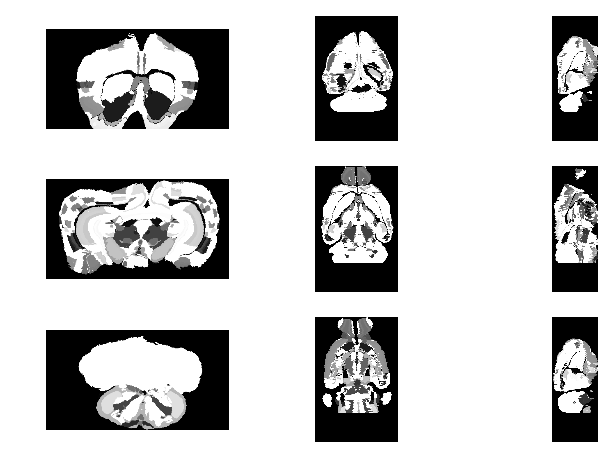

In [14]:
imgShow(inAnnoImg, vmax = 500)

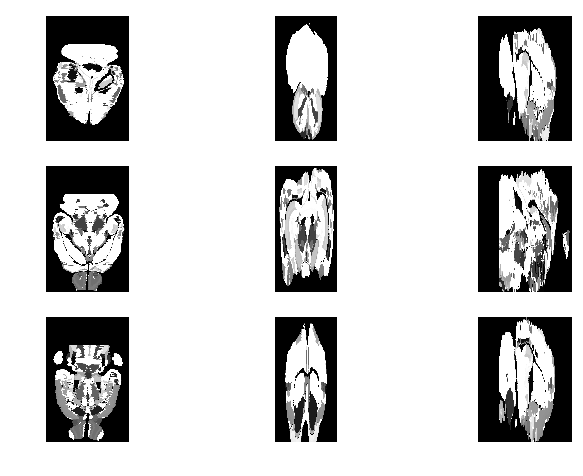

inverse affine


In [15]:
inAnnoImg = imgReorient(inAnnoImg, "RSA", ori1)
# inAnnoImg = imgReorient(inAnnoImg, "RSA", "LPS")
inAnnoImg = imgResample(inAnnoImg, spacing=inImg_download.GetSpacing(), size=inImg_download.GetSize(), useNearest=True)
imgShow(inAnnoImg, vmax = 500)

print "inverse affine"

In [17]:
imgName = inToken + "reorient_atlas"
location = "img/" + imgName + ".nii"
imgWrite(inAnnoImg, str(location))

In [18]:
img = claritybase(imgName, 'img')       # initial call for clarityviz
print "loaded into claritybase"
img.loadEqImg()
print "loaded image"
img.applyLocalEq()
print "local histogram equalization"
img.loadGeneratedNii()
print "loaded generated nii"

loaded into claritybase
Inside loadEqImg
Loading: img/Aut1367reorient_atlas.nii
Image Loaded: img/Aut1367reorient_atlas.nii
loaded image
Generating Histogram...
local histogram equalization
Loading: output/Aut1367reorient_atlas/Aut1367reorient_atlaslocaleq.nii
Image Loaded: output/Aut1367reorient_atlas/Aut1367reorient_atlaslocaleq.nii
loaded generated nii


In [19]:
num_points = 10000
img.calculatePointsByNumber(num_points)
print "calculated points"

Coverting to points...
token=Aut1367reorient_atlas
total=664734000
max=255.000000
threshold=0.900000
num_points=10000.000000
(This will take couple minutes)
Above threshold=31874845
total points:
31874845
v.shape:
(31874845,)
x.size before filter: 31874845
y.size before filter: 31874845
z.size before filter: 31874845
v.size before filter: 31874845
x.size after filter: 10118
y.size after filter: 10118
z.size after filter: 10118
v.size after filter: 10118
Samples=10118
Finished
calculated points


In [20]:
print "saving brightest points to csv"
img.savePoints()

saving brightest points to csv
self._token asdfasdf:
Aut1367reorient_atlas


In [21]:
# print "generating nodes and edges list"
# start = time.time()
# img.plot3d()

In [9]:
import nibabel as nb
from numpy import genfromtxt

# Token = imgName
Token = 'Aut1367reorient_atlas'
atlas_img = 'output/' + Token + '/' + Token + 'localeq' + '.nii'
atlas = nb.load(atlas_img)  # <- atlas .nii image
atlas_data = atlas.get_data()

csvfile = 'output/' + Token + '/' + Token + 'localeq.csv' # 'atlasexp/Control258localeq.csv'    # <- regular csv from the .nii to csv step

bright_points = genfromtxt(csvfile, delimiter=',')

locations = bright_points[:, 0:3]

regions = [atlas_data[l[0], l[1], l[2]] for l in locations]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



In [10]:
outfile = open('output/' + Token + '/' + Token + '.region.csv', 'w')
infile = open(csvfile, 'r')
for i, line in enumerate(infile):
    line = line.strip().split(',')
    outfile.write(",".join(line) + "," + str(regions[i]) + "\n")    # adding a 5th column to the original csv indicating its region (integer)
infile.close()
outfile.close()

In [27]:
print len(regions)
print regions[0:10]
uniq = list(set(regions))
numRegions = len(uniq)
print len(uniq)
print uniq

10118
[242, 242, 242, 237, 242, 242, 237, 237, 242, 237]
25
[230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 253, 254, 255]


In [8]:
from clarityviz import atlasregiongraph

atlas = atlasregiongraph('Aut1367reorient_atlas')
atlas.generate_atlas_region_graph(None, numRegions)

NameError: name 'numRegions' is not defined